# Hierarchical Clustering on Vehicle Dataset

An automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
df1=pd.read_csv("G:\Data science\Datasets\cars_clus.csv")
df1.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


The data set include price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

In [3]:
#general information on dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [4]:
#cleaning the dataset
df1[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df1[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df1=df1.dropna().reset_index()
df1.head()

,index,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,5,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [5]:
#statistical analysis
df1.describe()

,index,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,72.222222,59.112316,18.031538,0.247863,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.117949,3.401179,0.0
std,43.560721,75.058933,11.605632,0.433629,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404164,1.337862,0.0
min,0.000000,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,-2.207000,0.0
25%,36.000000,16.767000,11.240000,0.000000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,2.819000,0.0
50%,69.000000,32.299000,14.010000,0.000000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,3.475000,0.0
75%,111.000000,76.029000,19.875000,0.000000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,4.331000,0.0
max,149.000000,540.561000,67.550000,1.000000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,6.293000,0.0


In [6]:
#feature selection
df=df1[['engine_s','horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg']]

In [7]:
#normalization
from sklearn.preprocessing import MinMaxScaler
x=df.values
x=MinMaxScaler().fit_transform(x)
x[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [8]:
#modeling
from sklearn.metrics.pairwise import euclidean_distances
matrix=euclidean_distances(x,x)
matrix

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [9]:
from scipy.cluster import hierarchy 
dist_matrix=hierarchy.linkage(x,'complete')

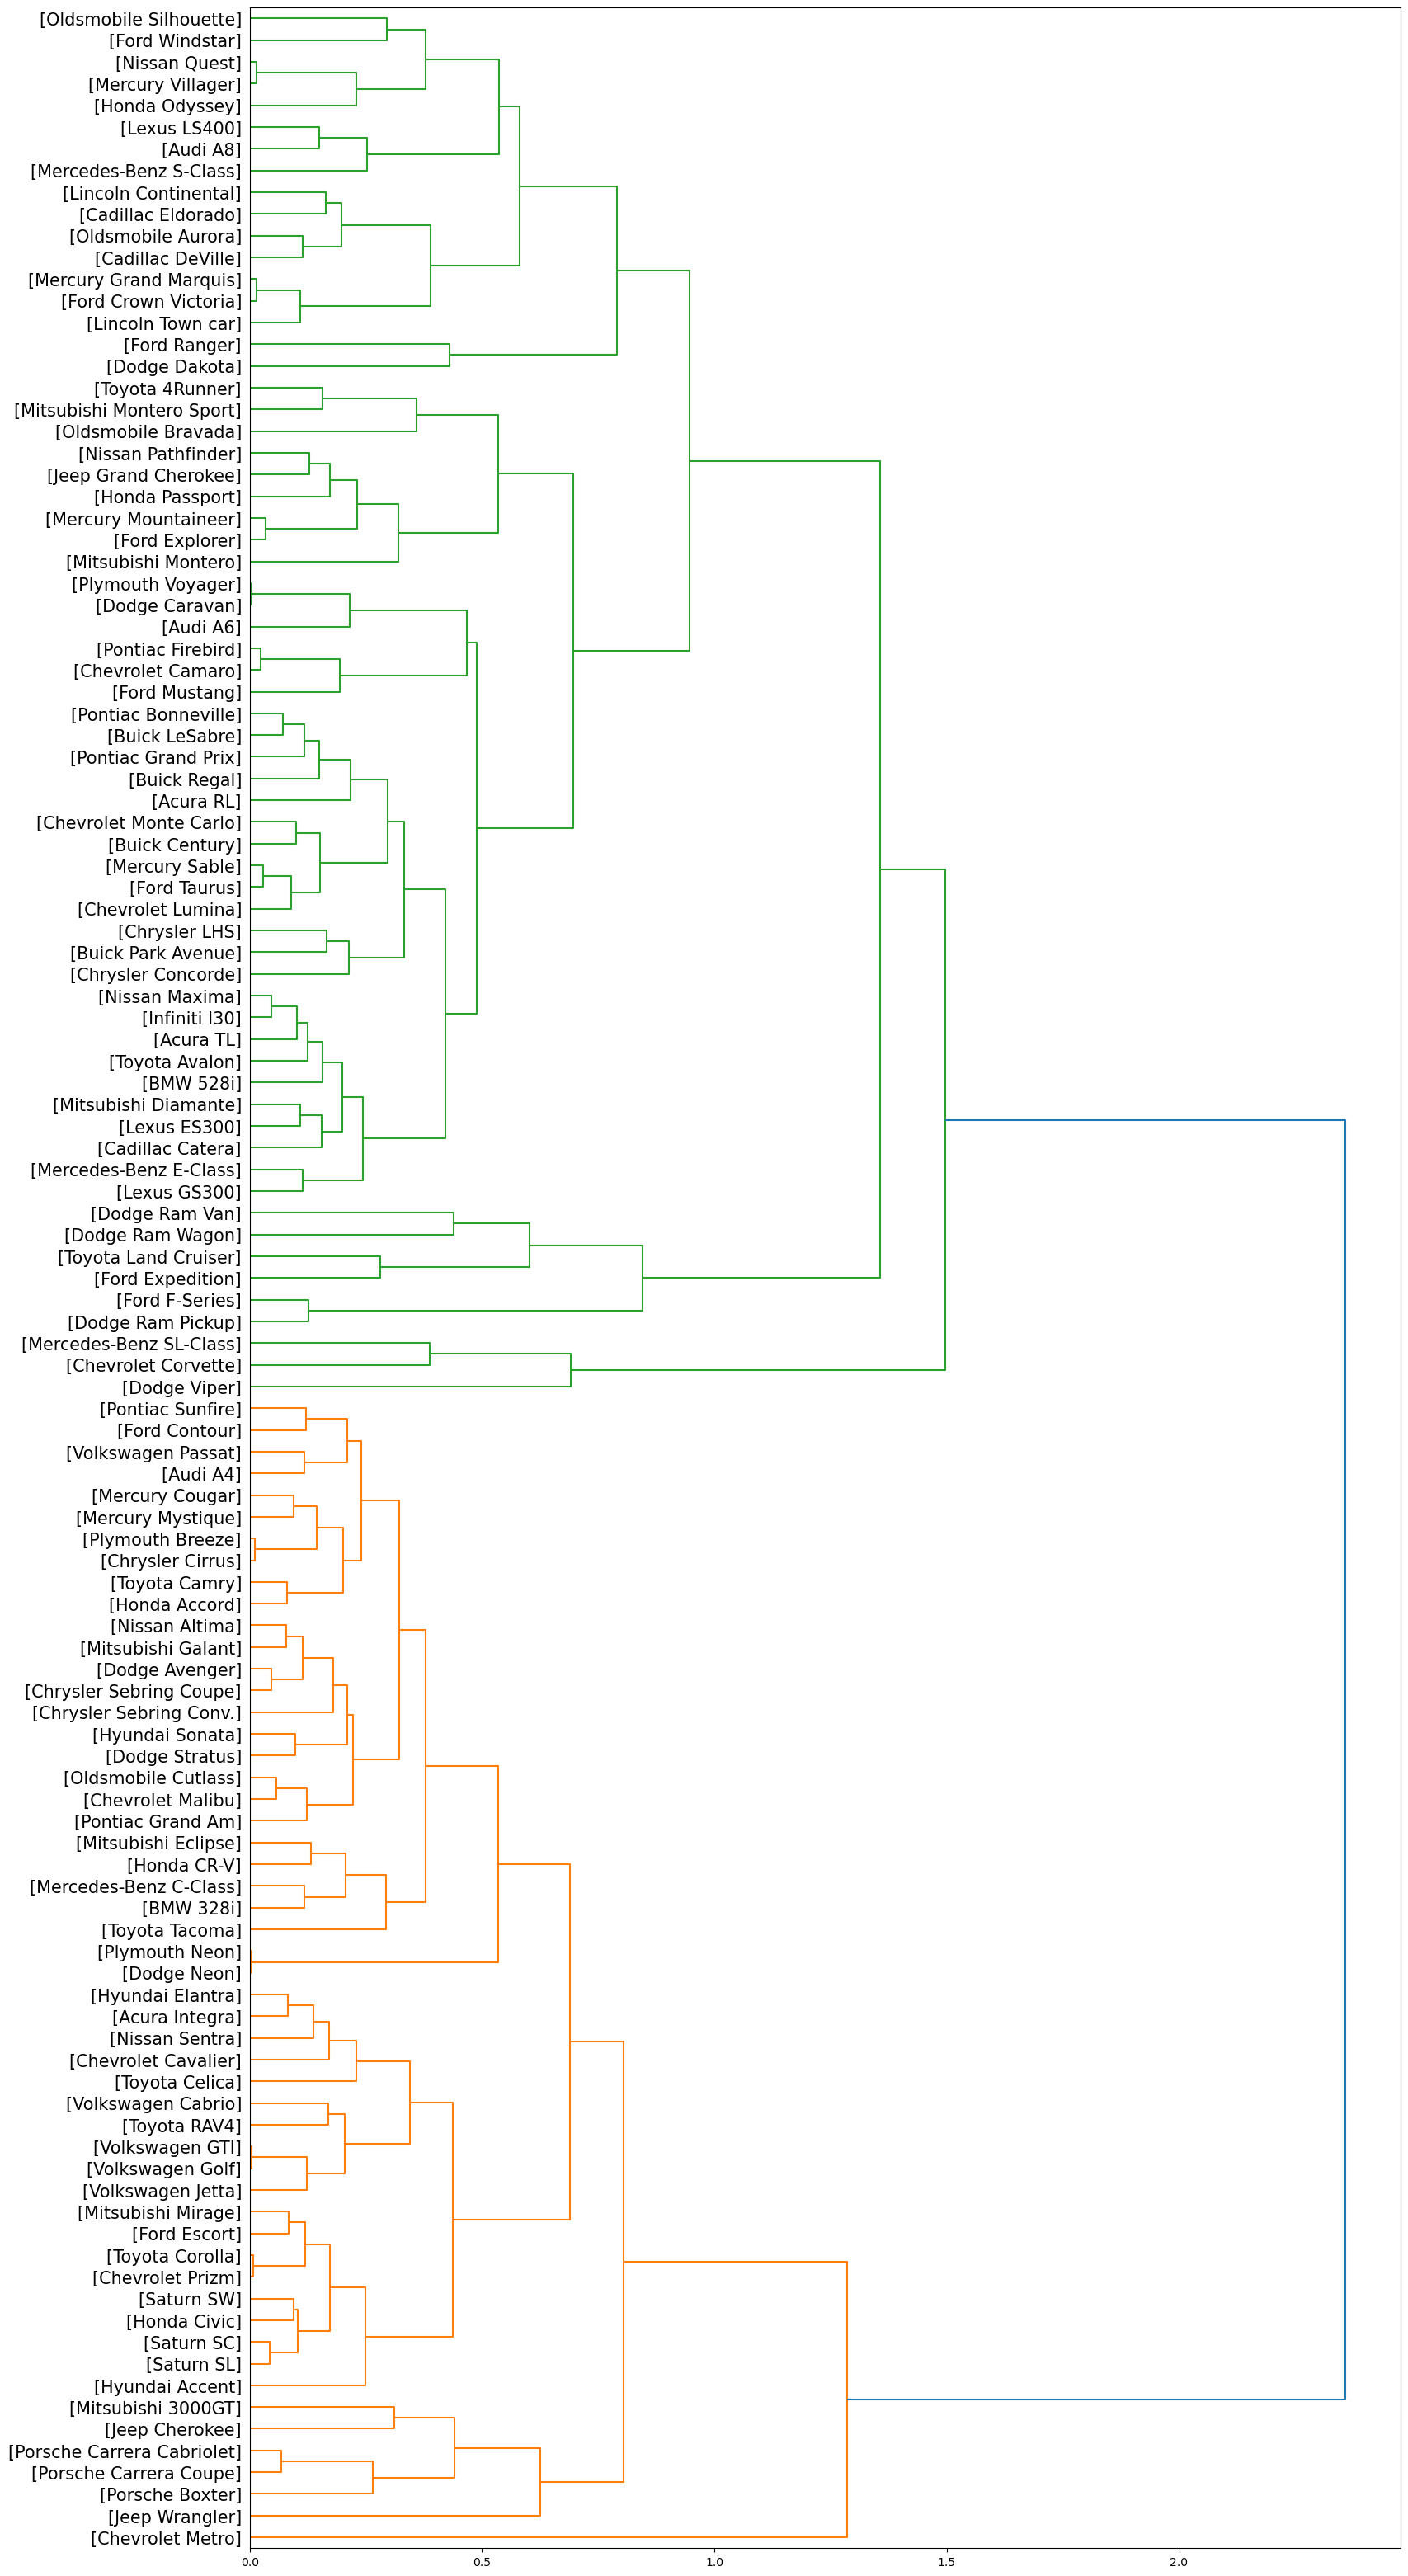

In [10]:
plt.figure(figsize=(18,40))
def llf(id):
    return '[%s %s]'%(df1['manufact'][id],df1['model'][id])
hierarchy.dendrogram(dist_matrix,leaf_label_func=llf,leaf_font_size=15,orientation='right');

In [11]:
#clustering
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=6,linkage='complete')
agg.fit(x)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [12]:
df1['clus']=agg.labels_
df1.head()

,index,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,clus
0,0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,5,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


In [13]:
df1.groupby(['clus','type'])['clus'].count()

clus  type
0     1.0      6
1     0.0     47
      1.0      5
2     0.0     27
      1.0     11
3     0.0     10
      1.0      7
4     0.0      1
5     0.0      3
Name: clus, dtype: int64

In [14]:
df1.groupby(['clus','type'])['horsepow','engine_s','mpg','price'].mean()

C:\Users\Happy\AppData\Local\Temp\ipykernel_23716\1481943123.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(['clus','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
clus type                                            
0    1.0   211.666667  4.483333  16.166667  29.024667
1    0.0   146.531915  2.246809  27.021277  20.306128
     1.0   145.000000  2.580000  22.200000  17.009200
2    0.0   203.111111  3.303704  24.214815  27.750593
     1.0   182.090909  3.345455  20.181818  26.265364
3    0.0   256.500000  4.410000  21.500000  42.870400
     1.0   160.571429  3.071429  21.428571  21.527714
4    0.0    55.000000  1.000000  45.000000   9.235000
5    0.0   365.666667  6.233333  19.333333  66.010000

It is obvious that we have 3 main clusters with the majority of vehicles in those.

Cars (Type=0):

    Cluster 1: with almost high mpg, and low in horsepower.

    Cluster 2: with good mpg and horsepower, but higher price than average.

    Cluster 3: with low mpg, high horsepower, highest price.

Trucks (Type=1):

    Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
    
    Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
    
    Cluster 3: with good mpg and horsepower, low price.

### Test case:

Lets consider a vehicle A with type=0,price=26,engine size=3,mpg=24 and horse power = 181 and find its cluster.

Our imaginary Vehicle A belongs to cluster 2 with good mpg and horsepower, but higher price than average.
